# Kaggle Store Sales Forecast

## What we know about the database:

In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

File Descriptions and Data Field Information\
**train.csv**\
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.\
**test.csv**\
The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.
sample_submission.csv
A sample submission file in the correct format.\
**stores.csv**\
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.\
**oil.csv**\
Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)\
**holidays_events.csv**\
Holidays and Events, with metadata
NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.\
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).\
**Additional Notes**\
Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

## About the project

Although this project as a part of a machine learning challenge in Kaggle, I grasped the opportunity to make a full analysis and visualization to the data to add it to my portfolio. 
After finishing the full analysis, I will make program a machine learning estimator with the scikit-learn tool and apply it to solve the challenge.


The main programing language for this project will be Python. I have also made some changes to the data with excel and Google’s Big Query SQL. For the visualization part, aside the use of matplotlib library, I will also use Tableau.


## About the company

A quick overview of Favorita Corporation:\
**History**: 
The Favorita Corporation began at Quito, Ecuador, in 1952 as a store that sold soaps, candles and imported items that turned into the first self-service supermarket that turned into a supermarket chain all over the western part of south and part of central America.


**Business Diversification**: 
The diversification of The Favorita Corporation contains three sections:
In the commercial section Favorita corporation has a diversified stores chains from supermarkets to toys and furniture stores.
In the real estate section commercial and industrial real estate.
In the industrial area they own they have warehouses and distribution centers for many different kinds of products, as well as a private power plant. \

**Sources:**\
Wikipedia: [es.wikipedia.org](https://es.wikipedia.org/wiki/Corporaci%C3%B3n_Favorita)\
Corporación Favorita: [Company's Website](https://www.corporacionfavorita.com/en/)


In [1]:
# Getting the data ready:
#Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
#Importing the Databases
holiday= pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
stores= pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
transactions= pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')
train=pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')

In [3]:
#exploring the databases:
holiday.head()
#holiday.dtypes

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
#change date datatype
holiday["date"]=pd.to_datetime(holiday["date"])

In [5]:
#Removing transferred holidays to make better predictions
holi=holiday.set_index("transferred")
hol1=holi.drop(True, )
hol1=hol1.reset_index()
hol1["date"]=pd.to_datetime(hol1["date"])
holiday=hol1
holiday.dtypes

transferred              bool
date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
dtype: object

In [6]:
#Reviewing transactionst
transactions.head()
transactions.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [7]:
#changing data types
transactions["date"]=pd.to_datetime(transactions["date"])
transactions["store_nbr"]=transactions["store_nbr"].astype(str)
transactions.dtypes
#transactions.head()

date            datetime64[ns]
store_nbr               object
transactions             int64
dtype: object

In [8]:
#reviewing stores
#change dtype of store number
stores["store_nbr"]=stores["store_nbr"].astype(str)
#removed type and cluster as I couldn't find their meaning
stores=stores.drop(["type","cluster"],axis=1)
stores.head()
len(stores)

54

In [9]:
#reviewing oil
#I removed null values in excel while calculating the average of cells above and below null cell
oil = pd.read_csv('../input/oil-instore-data/oil_nNull_v1.csv')
oil["date"]=pd.to_datetime(oil["date"],format="%d/%m/%Y")
oil.head()


,date,dcoilwtico
0,2013-01-01,93.128
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


In [10]:
#review train
#correct datatype
train["date"]=pd.to_datetime(train["date"])
train["id"]=train["id"].astype(str)
train["store_nbr"]=train["store_nbr"].astype(str)
train.dtypes

id                     object
date           datetime64[ns]
store_nbr              object
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [11]:
#clean checking null values
holiday.isna()
holiday.head()

,transferred,date,type,locale,locale_name,description
0,False,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,False,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,False,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,False,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,False,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba


In [12]:
stores.isna().sum()

store_nbr    0
city         0
state        0
dtype: int64

In [13]:
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [14]:
train.isna().sum()
train.dtypes
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [15]:
train.loc[train["family"]=="GROCERY I"].describe().round(decimals=3)

,sales,onpromotion
count,90936.000,90936.000
mean,3776.972,21.057
std,2874.209,33.306
min,0.000,0.000
25%,2117.000,0.000
50%,3185.000,5.000
75%,4726.000,36.000
max,124717.000,741.000


In [16]:
train.loc[train["sales"]==124717]

,id,date,store_nbr,family,sales,onpromotion
2163723,2163723,2016-05-02,2,GROCERY I,124717.0,59


In [17]:
groceries1=train.loc[train["family"]=="GROCERY I"]
groceries1.describe().round(decimals=3)

,sales,onpromotion
count,90936.000,90936.000
mean,3776.972,21.057
std,2874.209,33.306
min,0.000,0.000
25%,2117.000,0.000
50%,3185.000,5.000
75%,4726.000,36.000
max,124717.000,741.000


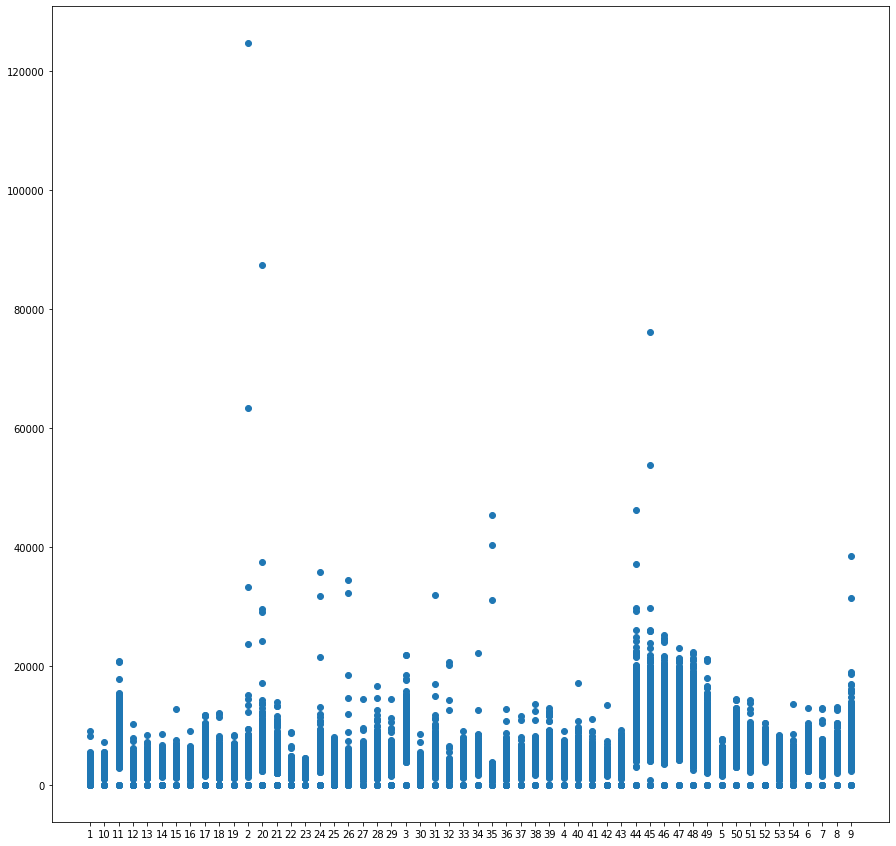

In [18]:
plt.figure(figsize=(15,15))
plt.scatter(groceries1["store_nbr"],groceries1["sales"])

In [19]:
str_2=groceries1.loc[groceries1["store_nbr"]=="2"]
str2_2016=str_2.loc[(str_2["date"].dt.year==2017)]

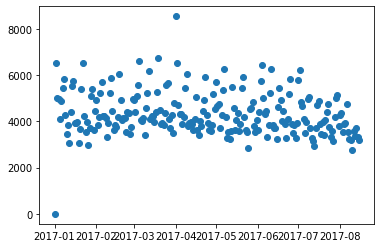

In [20]:
plt.scatter(str2_2016["date"],str2_2016["sales"])

In [21]:
str_2.loc[(str_2["date"].dt.year==2016)&(str_2["sales"]>8000)].describe().round(decimals=2)

,sales,onpromotion
count,10.00,10.00
mean,28230.90,52.50
std,37878.74,34.55
min,8273.00,19.00
25%,8614.25,26.25
50%,10858.50,41.00
75%,21378.75,61.25
max,124717.00,115.00


After a look at the stores information it seems like there are some outliers, but they make sense due to the fact that they are related to the earthquake relief efforts by the local community.


In [22]:
#pump up the data for the learning process
merged=pd.merge_ordered(train,oil,on="date",fill_method="ffill")
merged.loc[(merged["date"].dt.year==2017)&(merged["date"].dt.month==8)&(merged["date"].dt.day>15)]
merged=merged.drop(merged.index[3000891:])
#merged.groupby(by=merged["family"]).count()


In [23]:
#setting family as categorical data
encoder= preprocessing.LabelEncoder()
merged["family"]= encoder.fit_transform(merged["family"])
merged

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,0,0.000,0,93.128
1,1,2013-01-01,1,1,0.000,0,93.128
2,2,2013-01-01,1,2,0.000,0,93.128
3,3,2013-01-01,1,3,0.000,0,93.128
4,4,2013-01-01,1,4,0.000,0,93.128
...,...,...,...,...,...,...,...
3000886,3000883,2017-08-15,9,28,438.133,0,47.570
3000887,3000884,2017-08-15,9,29,154.553,1,47.570
3000888,3000885,2017-08-15,9,30,2419.729,148,47.570
3000889,3000886,2017-08-15,9,31,121.000,8,47.570


In [24]:
#cut the training into smaller segmet to train and test
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import date
merged_500k=merged.iloc[0:2000000]
merged_500k
pd.options.mode.chained_assignment = None
#dt.strptime(merged_500k["date"], "%Y-%m-%d").toordinal()
merged_500k["date"]= merged_500k['date'].apply(lambda x: x.toordinal())
merged_500k

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,734869,1,0,0.0000,0,93.128
1,1,734869,1,1,0.0000,0,93.128
2,2,734869,1,2,0.0000,0,93.128
3,3,734869,1,3,0.0000,0,93.128
4,4,734869,1,4,0.0000,0,93.128
...,...,...,...,...,...,...,...
1999995,1999992,735994,25,27,0.0000,0,33.660
1999996,1999993,735994,25,28,156.6330,0,33.660
1999997,1999994,735994,25,29,40.8290,0,33.660
1999998,1999995,735994,25,30,1212.1641,0,33.660


In [25]:
X= merged_500k.drop("sales",axis=1)
y= merged_500k["sales"]
np.random.seed(42)

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9160512274659093

In [26]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model,X,y,cv=3, scoring='r2')

#y_pred= model.predict(X_test)
#mse=mean_squared_log_error(y_test,y_pred)
#mse

In [27]:
cv.mean()

0.4244930935339597

In [28]:
test=pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
test["date"]


0        2017-08-16
1        2017-08-16
2        2017-08-16
3        2017-08-16
4        2017-08-16
            ...    
28507    2017-08-31
28508    2017-08-31
28509    2017-08-31
28510    2017-08-31
28511    2017-08-31
Name: date, Length: 28512, dtype: object

In [29]:
test=pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
test1=test
encoder= preprocessing.LabelEncoder()
test["family"]= encoder.fit_transform(test["family"])
test["date"]=pd.to_datetime(test["date"])
testm=pd.merge_ordered(test,oil,on="date",fill_method="ffill")
testm.loc[(testm["date"].dt.year==2017)&(testm["date"].dt.month==8)&(testm["date"].dt.day>=15)]
testm=testm.dropna()
testm["date"]= testm['date'].apply(lambda x: x.toordinal())
print(test1)

            id       date  store_nbr  family  onpromotion
0      3000888 2017-08-16          1       0            0
1      3000889 2017-08-16          1       1            0
2      3000890 2017-08-16          1       2            2
3      3000891 2017-08-16          1       3           20
4      3000892 2017-08-16          1       4            0
...        ...        ...        ...     ...          ...
28507  3029395 2017-08-31          9      28            1
28508  3029396 2017-08-31          9      29            0
28509  3029397 2017-08-31          9      30            1
28510  3029398 2017-08-31          9      31            9
28511  3029399 2017-08-31          9      32            0

[28512 rows x 5 columns]


In [30]:
#predict test
solution=model.predict(testm)

In [31]:
solution


array([5.33000000e+00, 1.40000000e-01, 1.05501000e+03, ...,
       2.31813083e+03, 2.16564290e+02, 1.55876399e+01])

In [32]:
testm

,id,date,store_nbr,family,onpromotion,dcoilwtico
1206,3000888.0,736557,1.0,0.0,0.0,46.80
1207,3000889.0,736557,1.0,1.0,0.0,46.80
1208,3000890.0,736557,1.0,2.0,2.0,46.80
1209,3000891.0,736557,1.0,3.0,20.0,46.80
1210,3000892.0,736557,1.0,4.0,0.0,46.80
...,...,...,...,...,...,...
29713,3029395.0,736572,9.0,28.0,1.0,47.26
29714,3029396.0,736572,9.0,29.0,0.0,47.26
29715,3029397.0,736572,9.0,30.0,1.0,47.26
29716,3029398.0,736572,9.0,31.0,9.0,47.26


In [33]:
s1=testm["id"]
s2=solution

s1=s1.tolist()
s2=s2.tolist()
d = {'id': s1, 'sales': s2}
d=pd.DataFrame(data=d)
d["id"]=d["id"].astype(int)
d["id"]=d["id"].astype(str)
d.to_csv("solution.csv",index=False)
